In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# To display plots inline
%matplotlib inline


In [2]:
# Assuming you have already uploaded the dataset in Colab using the upload method
from google.colab import files
uploaded = files.upload()

# Load the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['engine_data.csv']))  # Modify the filename if needed

# Display basic information
df.info()

# Check for null values
df.isnull().sum()


Saving engine_data.csv to engine_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


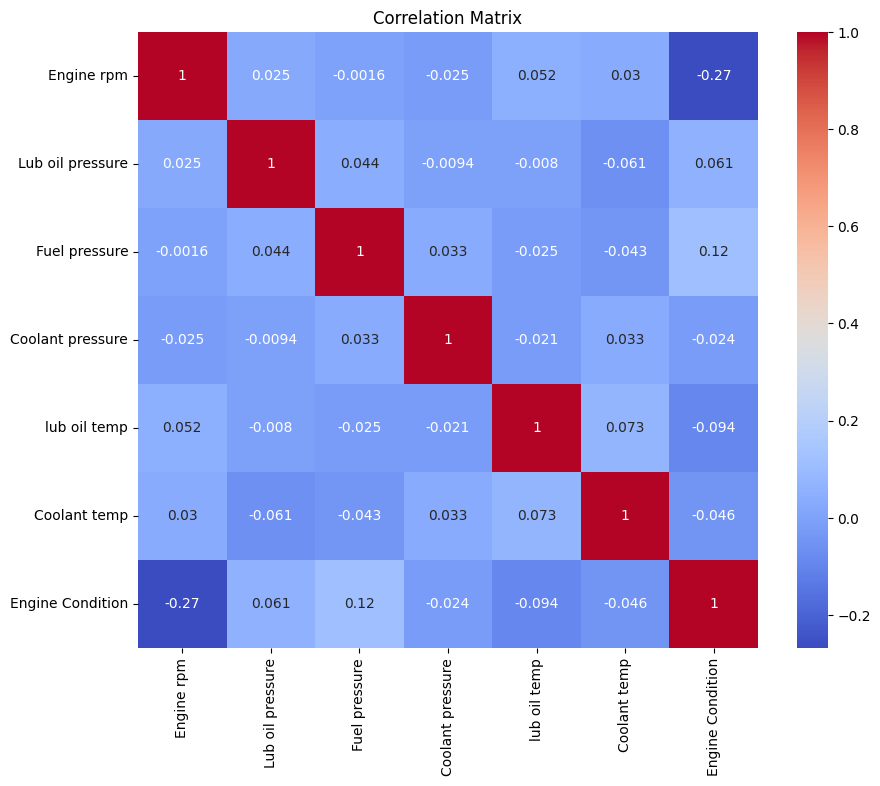

In [3]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


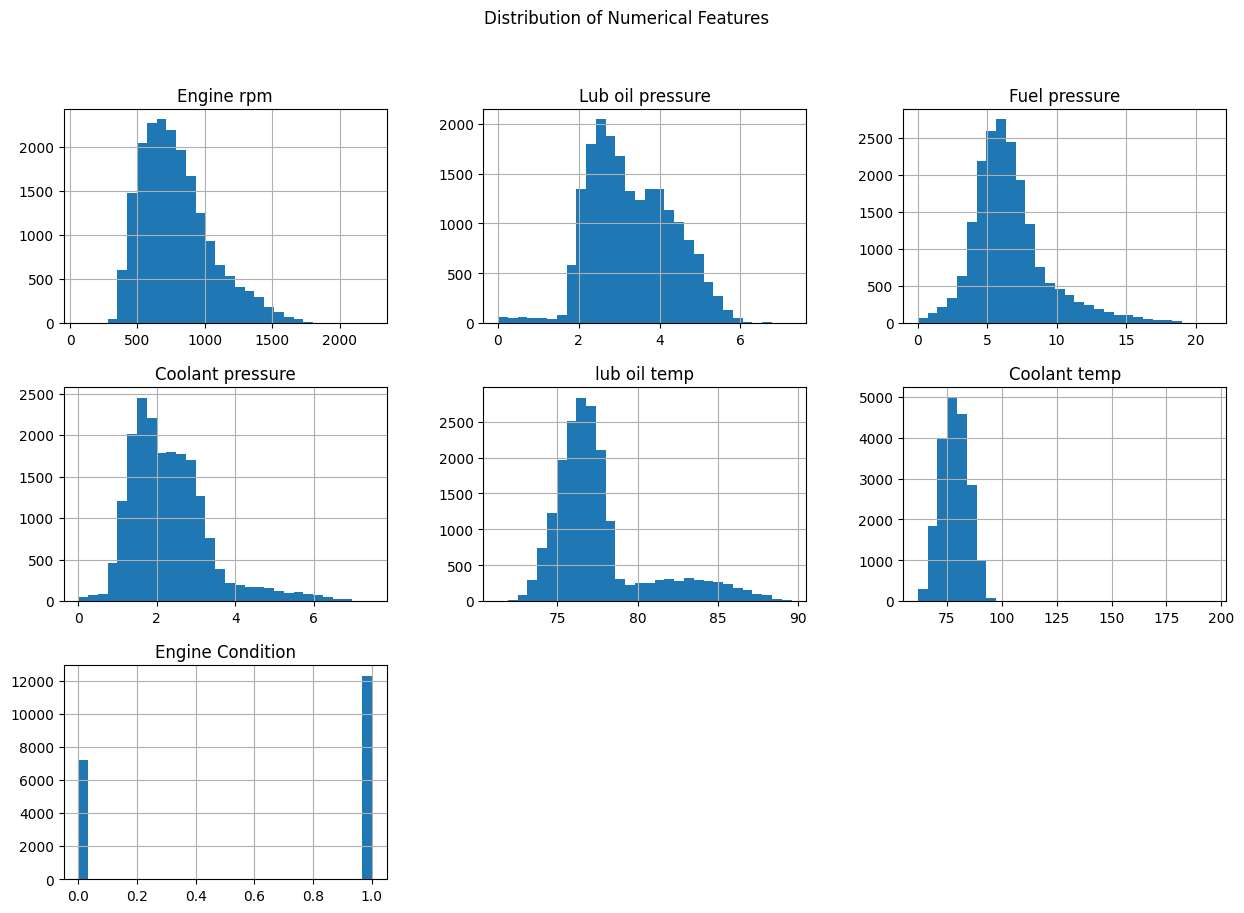

In [4]:
# Histograms of each numerical feature
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


In [5]:
# Define features and target
X = df.drop('Engine Condition', axis=1)  # Drop target variable
y = df['Engine Condition']  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Step 6: Convert the Scaled Data to DataFrame for Better Visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Step 7: Display the First Few Rows of Scaled and Non-Scaled Training and Testing Data

# Non-scaled Training and Testing Data
print("Non-Scaled Training Data:")
print(X_train.head())

print("\nNon-Scaled Testing Data:")
print(X_test.head())

# Scaled Training and Testing Data
print("\nScaled Training Data:")
print(X_train_scaled_df.head())

print("\nScaled Testing Data:")
print(X_test_scaled_df.head())


Non-Scaled Training Data:
       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
6690          489          2.134818       5.674162          3.370571   
1255          910          2.105410       5.381185          1.714422   
3315          523          2.991344       4.781397          2.687113   
3684          727          2.928145       8.276127          1.318319   
10223         666          3.527191       8.625874          2.096356   

       lub oil temp  Coolant temp  
6690      76.291865     74.695573  
1255      75.479919     79.927530  
3315      76.939586     76.401910  
3684      78.202955     71.288606  
10223     74.028029     66.678025  

Non-Scaled Testing Data:
       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
828           682          2.391656       4.617196          2.848982   
16075         605          5.466877       6.424361          5.727520   
19179         658          3.434232       3.680896          1.678708   
13967      